In [1]:
import random
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pandas as pd
import xlrd
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression

In [3]:
#读取文件
datafile = u'dengranyouquxian.xlsx'#文件所在位置，u为防止路径中有中文名称，此处没有，可以省略

In [4]:
data = pd.read_excel(datafile)

In [5]:
examDf = DataFrame(data)

In [6]:
examDf.head()

,One,Ne,Tp,square_Ne,ne_multi_Tp,square_Tp,cube_Ne,square_Ne_multi_Tp,cube_Tp,be,n,tp
0,1,5500,159.5,30250000,877250.0,25440.25,166375000000,4.824875e+09,4057719.875,391.8,5500.0,159.5
1,1,5500,140.1,30250000,770550.0,19628.01,166375000000,4.238025e+09,2749884.201,355.1,5000.0,162.0
2,1,5500,120.5,30250000,662750.0,14520.25,166375000000,3.645125e+09,1749690.125,298.1,4500.0,186.9
3,1,5500,100.5,30250000,552750.0,10100.25,166375000000,3.040125e+09,1015075.125,267.3,4000.0,201.7
4,1,5500,90.3,30250000,496650.0,8154.09,166375000000,2.731575e+09,736314.327,266.1,3500.0,210.8


In [7]:
examDf.Ne

0      5500
1      5500
2      5500
3      5500
4      5500
       ... 
215    1000
216    1000
217    1000
218    1000
219    1000
Name: Ne, Length: 220, dtype: int64

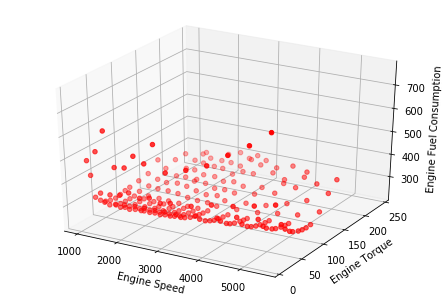

In [8]:
fig0 = pyplot.figure()
ax0 = Axes3D(fig0)

X = examDf.Ne
Y = examDf.Tp
Z = examDf.be

#绘制散点图,examDf.ne为X轴，examDf.Tp为Y轴, examDf.be为Z轴
ax0.scatter(X, Y, Z, color = 'red', label = "Exam Data")
#添加图的标签（x轴，y轴， z轴）
ax0.set_xlabel("Engine Speed")#设置X轴标签
ax0.set_ylabel("Engine Torque")#设置Y轴标签
ax0.set_zlabel("Engine Fuel Consumption")#设置X轴标签

pyplot.show()#显示图像

In [12]:
train_X = np.column_stack((examDf.One,
                           examDf.Ne,examDf.Tp, 
                           examDf.square_Ne, 
                           examDf.ne_multi_Tp, 
                           examDf.square_Tp, 
                           examDf.cube_Ne, 
                           examDf.square_Ne_multi_Tp,
                           examDf.cube_Tp))
train_Y = np.array(examDf.be)

In [13]:
#建立多元线性回归模型
linreg = LinearRegression()

In [14]:
model = linreg.fit(train_X, train_Y)

In [15]:
#获取训练后的模型权重
linreg.intercept_

619.2280518137825

In [16]:
#建立线性回归模型

linreg1 = LinearRegression()
model1 = linreg1.fit(np.column_stack((examDf.One ,examDf.Ne,examDf.Tp)), examDf.be)

In [17]:
linreg.coef_

array([ 0.00000000e+00, -5.14846779e-02, -8.94151359e+00,  1.40430324e-05,
       -1.36199000e-04,  7.22496803e-02, -7.11683275e-10,  1.69395888e-08,
       -1.64939476e-04])

Text(0.5, 0, 'Engine Fuel Consumption')

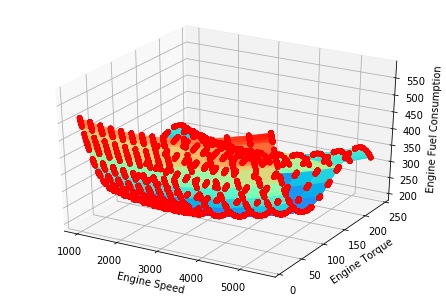

In [18]:
#绘制3D拟合曲线模型图
fig1 = pyplot.figure()
ax1 = Axes3D(fig1)

x = examDf.Ne
y = examDf.Tp

#需要增加一个步骤，用于“过滤”数据，目的是让发动机外特性曲线成为边界

x ,y = np.meshgrid(x, y)
z = linreg.coef_[0] + linreg.coef_[1] * x + linreg.coef_[2] * y + linreg.coef_[3] * x * x + linreg.coef_[4] * x * y + linreg.coef_[5] * y * y + linreg.coef_[6] * x * x * x + linreg.coef_[7] * x* x * y + linreg.coef_[8] * y * y * y + linreg.intercept_
ax1.plot_surface(x, y, z, rstride = 1,  # row为行步长
                 cstride = 2,           # colum为列步长
                 cmap='rainbow' )   # 渐变颜色

ax1.scatter(x, y, z, color = 'red')

#添加图的标签（x轴，y轴， z轴）
ax1.set_xlabel("Engine Speed")#设置X轴标签
ax1.set_ylabel("Engine Torque")#设置Y轴标签
ax1.set_zlabel("Engine Fuel Consumption")#设置X轴标签

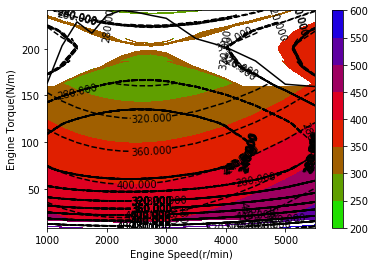

In [19]:
# 绘制等燃油消耗曲线（等高线）
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
cset_be = pyplot.contourf(x, y, z, 8,cmap = pyplot.cm.brg_r)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色， 绘制线为虚线
contour_be = pyplot.contour(x, y, z, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
pyplot.clabel(contour_be, inline = True, fontsize=10, colors = 'k')
# 设置右侧的颜色条
pyplot.colorbar(cset_be)

# 绘制等功率曲线（等高线）
# 发动机功率等于发动机转速乘以转矩再除以9550
# p = (x * y) / 9550
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
# cset_be = pyplot.contourf(x, y, z, 6,cmap = pyplot.cm.hot)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色
# contour_p = pyplot.contour(x, y, p, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
# pyplot.clabel(contour_p, inline = True, fontsize=10, colors = 'k')

# 绘制发动机外特性曲线
# x_Ne为转速，y_Tp为绘制外特性曲线所需要的最大扭矩
x_Ne = examDf.n
y_Tp = examDf.tp
# -k表示以黑色实线绘制
max_torque = pyplot.plot(x_Ne, y_Tp, '-k')
# 填充外特性曲线上的区域颜色
# pyplot.fill(x_Ne, y_Tp,)

# 设置x、y坐标的标签
pyplot.xlabel("Engine Speed(r/min)")
pyplot.ylabel("Engine Torque(N/m)")
# 保存图片
pyplot.savefig('./wan you te xing qu xian.png')
pyplot.show()

In [20]:
#拟合模型的X、Y、Z值
#X_fit为发动机转速
#Y_fit为发动机扭矩
#Z_fit为燃油消耗

#X_fit = np.linspace(examDf.Ne.min(),examDf.Ne.max(),100)
#Y_fit = np.linspace(examDf.Tp.min(),examDf.Tp.max(),100)
#Matrix_X = np.column_stack((np.ones(100), X_fit, Y_fit,#构建模型矩阵
#                            np.square(X_fit), X_fit*Y_fit, 
#                            np.square(Y_fit)))
#残差（截距）
#设置残差矩阵
#intercept = linreg.intercept_*np.ones(100)

#Z_fit = np.dot(Matrix_X, linreg.coef_) + intercept #两个矩阵相乘
    #用np.dot，这个是点乘，叉乘是*

#z = linreg.coef_[0] + linreg.coef_[1] * x + linreg.coef_[2] * y + linreg.coef_[3] * x**2 + linreg.coef_[4] * x*y + linreg.coef_[5] * y**2 + linreg.intercept_
 
#最好不要要常规的数学思维去构建这个拟合函数，而应该尝试通过矩阵相乘的形式来解决2

Text(0.5, 0, 'Engine Fuel Consumption')

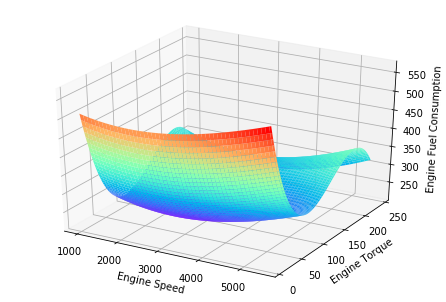

In [21]:
#绘制3D拟合曲线模型图
fig1 = pyplot.figure()
ax1 = Axes3D(fig1)

x = np.linspace(examDf.Ne.min(),examDf.Ne.max(), 100)
y = np.linspace(examDf.Tp.min(),examDf.Tp.max(), 100)

#需要增加一个步骤，用于“过滤”数据，目的是让发动机外特性曲线成为边界


x ,y = np.meshgrid(x, y)
z = linreg.coef_[0] + linreg.coef_[1] * x + linreg.coef_[2] * y + linreg.coef_[3] * x * x + linreg.coef_[4] * x * y + linreg.coef_[5] * y * y + linreg.coef_[6] * x * x * x + linreg.coef_[7] * x* x * y + linreg.coef_[8] * y * y * y + linreg.intercept_
ax1.plot_surface(x, y, z, rstride = 1,  # row为行步长
                 cstride = 2,           # colum为列步长
                 cmap='rainbow' )   # 渐变颜色

#添加图的标签（x轴，y轴， z轴）
ax1.set_xlabel("Engine Speed")#设置X轴标签
ax1.set_ylabel("Engine Torque")#设置Y轴标签
ax1.set_zlabel("Engine Fuel Consumption")#设置X轴标签

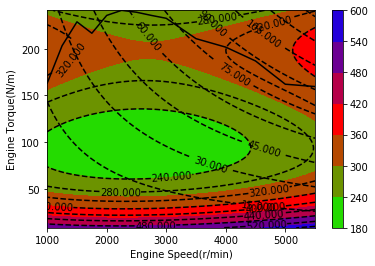

In [22]:
# 绘制等燃油消耗曲线（等高线）
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
cset_be = pyplot.contourf(x, y, z, 6,cmap = pyplot.cm.brg_r)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色， 绘制线为虚线
contour_be = pyplot.contour(x, y, z, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
pyplot.clabel(contour_be, inline = True, fontsize=10, colors = 'k')
# 设置右侧的颜色条
pyplot.colorbar(cset_be)

# 绘制等功率曲线（等高线）
# 发动机功率等于发动机转速乘以转矩再除以9550
p = (x * y) / 9550
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
# cset_be = pyplot.contourf(x, y, z, 6,cmap = pyplot.cm.hot)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色
contour_p = pyplot.contour(x, y, p, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
pyplot.clabel(contour_p, inline = True, fontsize=10, colors = 'k')

# 绘制发动机外特性曲线
# x_Ne为转速，y_Tp为绘制外特性曲线所需要的最大扭矩
x_Ne = examDf.n
y_Tp = examDf.tp
# -k表示以黑色实线绘制
max_torque = pyplot.plot(x_Ne, y_Tp, '-k')
# 填充外特性曲线上的区域颜色
# pyplot.fill(x_Ne, y_Tp,)

# 设置x、y坐标的标签
pyplot.xlabel("Engine Speed(r/min)")
pyplot.ylabel("Engine Torque(N/m)")
# 保存图片
pyplot.savefig('./wan you te xing qu xian.png')
pyplot.show()

In [158]:
# 返回每一组相同转速数据下所对应的最大扭矩值组成的矩阵
b = np.column_stack((examDf.Ne, examDf.Tp))
# 去除整个Ne数组的重复元素
x_ne = np.unique(examDf.Ne)

In [64]:
# 统计数组Ne中每个数据的重复次数
import collections
c = collections.Counter(examDf.Ne)

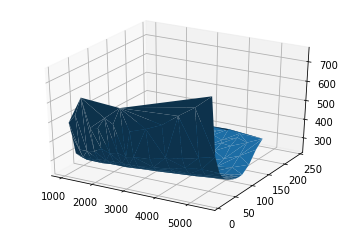

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = examDf.Ne
y = examDf.Tp
z = examDf.be
ax.plot_trisurf(x, y, z)
plt.show()

TypeError: Input z must be a 2D array.

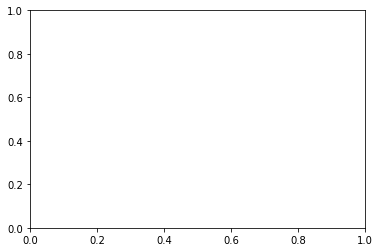

In [11]:
# 绘制等燃油消耗曲线（等高线）
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
cset_be = pyplot.contourf(x, y, z, 6,cmap = pyplot.cm.brg_r)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色， 绘制线为虚线
contour_be = pyplot.contour(x, y, z, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
pyplot.clabel(contour_be, inline = True, fontsize=10, colors = 'k')
# 设置右侧的颜色条
pyplot.colorbar(cset_be)

# 绘制等功率曲线（等高线）
# 发动机功率等于发动机转速乘以转矩再除以9550
p = (x * y) / 9550
# 进行颜色填充
# pyplot.cm.hot表明设置的颜色为渐变
# cset_be = pyplot.contourf(x, y, z, 6,cmap = pyplot.cm.hot)
# 进行等高线绘制,绘制10条线，并设置颜色为黑色
contour_p = pyplot.contour(x, y, p, 10, colors = 'k', linestyles = 'dashed')
# 线条标注的绘制
# inline标注表明数字是否嵌入线内
# fontsize是字体大小
# colors是字体颜色
pyplot.clabel(contour_p, inline = True, fontsize=10, colors = 'k')

# 绘制发动机外特性曲线
# x_Ne为转速，y_Tp为绘制外特性曲线所需要的最大扭矩
x_Ne = examDf.n
y_Tp = examDf.tp
# -k表示以黑色实线绘制
max_torque = pyplot.plot(x_Ne, y_Tp, '-k')
# 填充外特性曲线上的区域颜色
# pyplot.fill(x_Ne, y_Tp,)

# 设置x、y坐标的标签
pyplot.xlabel("Engine Speed(r/min)")
pyplot.ylabel("Engine Torque(N/m)")
# 保存图片
pyplot.savefig('./wan you te xing qu xian.png')
pyplot.show()